Enter number of nodes:  6
Enter number of edges:  6


Enter edges (one pair per line):


 0 1
 0 2
 1 3
 1 4
 2 5
 4 5
Enter start node:  0


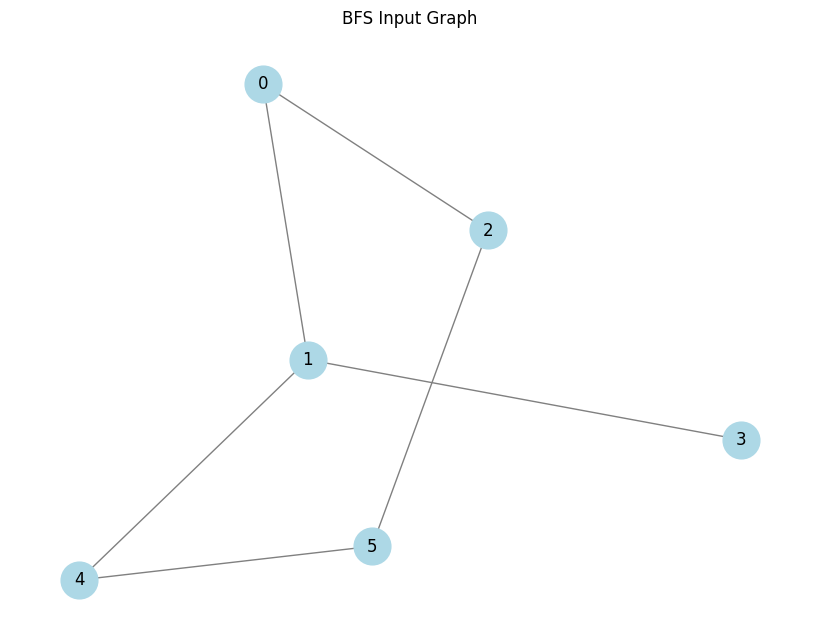


BFS Traversal Order:
[0, 1, 2, 3, 4, 5]


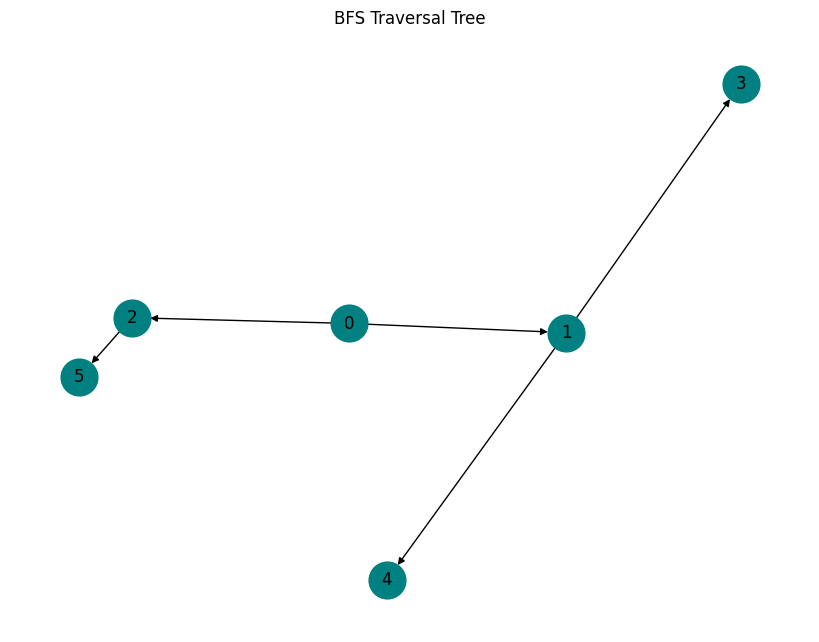

In [4]:
# 3. Implement Breadth First Search Algorithm. Read the undirected
# unweighted graph from user. 
import networkx as nx
import matplotlib.pyplot as plt
from collections import deque

class GraphVisualization:
    def __init__(self):
        self.graph = {}

    def addEdge(self, a, b):
        if a not in self.graph:
            self.graph[a] = []
        if b not in self.graph:
            self.graph[b] = []
        self.graph[a].append(b)
        self.graph[b].append(a)

    def visualize(self, title):
        G = nx.Graph()
        for node in self.graph:
            for neighbor in self.graph[node]:
                G.add_edge(node, neighbor)

        pos = nx.spring_layout(G)
        plt.figure(figsize=(8, 6))
        nx.draw(G, pos, with_labels=True, node_color="lightblue", node_size=700, edge_color="gray")
        plt.title(title)
        plt.show()

    def bfs_with_tree(self, start):
        visited = set()
        queue = deque([start])
        order = []
        tree_edges = []
        parent_map = {}

        while queue:
            node = queue.popleft()
            if node not in visited:
                visited.add(node)
                order.append(node)
                for neighbor in self.graph[node]:
                    if neighbor not in visited:
                        queue.append(neighbor)
                        if neighbor not in parent_map:
                            parent_map[neighbor] = node
                            tree_edges.append((node, neighbor))

        return order, tree_edges

    def visualize_tree(self, tree_edges, title):
        T = nx.DiGraph()
        T.add_edges_from(tree_edges)
        pos = nx.spring_layout(T)

        plt.figure(figsize=(8, 6))
        nx.draw(T, pos, with_labels=True, node_color="teal", node_size=700, edge_color="black", arrows=True)
        plt.title(title)
        plt.show()


# Create the graph and take input from user
G = GraphVisualization()
num_nodes = int(input("Enter number of nodes: "))
num_edges = int(input("Enter number of edges: "))

print("Enter edges (one pair per line):")
for _ in range(num_edges):
    a, b = map(int, input().split())
    G.addEdge(a, b)

start_node = int(input("Enter start node: "))

G.visualize("BFS Input Graph")

bfs_order, bfs_tree = G.bfs_with_tree(start_node)

print("\nBFS Traversal Order:")
print(bfs_order)

G.visualize_tree(bfs_tree, "BFS Traversal Tree")
# edges.csv 0,1 | 0,2 | 1,3 | 1,4 | 2,5 | 2,6 | 3,7 | 3,8 | 4,9 | 5,6 | 6,7 | 7,8 | 8,9 | 0,5 | 1,6 | 2,9 | 3,5 | 4,8 | 0,7 | 1,8 | 6,9 | 5,9 | 0,6 | 3,9 | 2,4
# edges_small.csv 6,6 0,1 | 0,2 | 1,3 | 1,4 | 2,5 | 4,5 